In [21]:
%load_ext autoreload
%autoreload 2

import jax
from pbo.environment.bicycle import BicycleEnv


env = BicycleEnv(jax.random.PRNGKey(10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
env.reset()

for _ in range(1000):
    action = [0, 0]
    state, reward, absorbing = env.step(action)

    if absorbing[0]:
        break
    env.render(action)
    env.add_position()

In [26]:
env.close()

In [147]:
import numpy as np 

from pbo.environment.viewer import Viewer

state = env.state

viewer = Viewer(2, 2, width=1000, height=1000)

dark_blue = (102, 153, 255)
light_blue = (131, 247, 228)
grey = (200, 200, 200)
red = (255, 0, 0)

omega, _, theta, _, psi = state

# Split in three screens
viewer.line([1, 0], [1, 1], width=2)
viewer.line([0, 1], [2, 1], width=2)
center_left = [0.5, 0.5]
center_right = [1.5, 0.1]
center_top = [1, 1.5]

# --- Left plot --- #
# Axes
viewer.text(viewer._translate([0.4, -0.04], center_left), "x")
viewer.line(
    viewer._translate([-0.4, 0], center_left), viewer._translate([0.4, 0], center_left), width=2
)
viewer.arrow_head(viewer._translate([0.4, 0], center_left), 0.05, 0)
viewer.text(viewer._translate([-0.06, 0.4], center_left), "y")
viewer.line(
    viewer._translate([0, -0.4], center_left), viewer._translate([0, 0.4], center_left), width=2
)
viewer.arrow_head(viewer._translate([0, 0.4], center_left), 0.05, np.pi / 2)
viewer.text(viewer._translate([-0.45, -0.4], center_left), "z")
viewer.circle(viewer._translate([-0.4, -0.4], center_left), 0.01, width=1)
viewer.circle(viewer._translate([-0.4, -0.4], center_left), 0.005, width=2)

# Bicycle
viewer.line(
    viewer._translate(viewer._rotate([-0.3, 0], psi), center_left),
    viewer._translate(viewer._rotate([0.3, 0], psi), center_left),
    color=dark_blue,
    width=5,
)

# Handbar
viewer.line(
    viewer._translate(
        viewer._rotate([0, -0.15], psi), center_left + viewer._rotate([0.3, 0], psi)
    ),
    viewer._translate(
        viewer._rotate([0, 0.15], psi), center_left + viewer._rotate([0.3, 0], psi)
    ),
    color=grey,
    width=1,
)
viewer.line(
    viewer._translate(
        viewer._rotate([0, -0.15], psi + theta), center_left + viewer._rotate([0.3, 0], psi)
    ),
    viewer._translate(
        viewer._rotate([0, 0.15], psi + theta), center_left + viewer._rotate([0.3, 0], psi)
    ),
    color=light_blue,
    width=5,
)

# Torque
if action is not None:
    viewer.torque_arrow(center_left + viewer._rotate([0.3, 0], psi), action[1], 2, 0.1)

# --- Right plot --- #
# Axes
viewer.text(viewer._translate([0.4, -0.04], center_right), "x")
viewer.line(
    viewer._translate([-0.4, 0], center_right), viewer._translate([0.4, 0], center_right), width=2
)
viewer.arrow_head(viewer._translate([0.4, 0], center_right), 0.05, 0)
viewer.text(viewer._translate([-0.06, 0.7], center_right), "z")
viewer.line(
    viewer._translate([0, -0.1], center_right), viewer._translate([0, 0.7], center_right), width=2
)
viewer.arrow_head(viewer._translate([0, 0.7], center_right), 0.05, np.pi / 2)
viewer.text(viewer._translate([0.4, 0.78], center_right), "y")
viewer.circle(viewer._translate([0.4, 0.8], center_right), 0.01, width=1)
viewer.line(
    viewer._translate(viewer._rotate([-0.01, 0], np.pi / 4), center_right + np.array([0.4, 0.8])),
    viewer._translate(viewer._rotate([0.01, 0], np.pi / 4), center_right + np.array([0.4, 0.8])),
    width=1,
)
viewer.line(
    viewer._translate(viewer._rotate([0, -0.01], np.pi / 4), center_right + np.array([0.4, 0.8])),
    viewer._translate(viewer._rotate([0, 0.01], np.pi / 4), center_right + np.array([0.4, 0.8])),
    width=1,
)

# Bicycle
viewer.line(
    viewer._translate([0, 0], center_right),
    viewer._translate(viewer._rotate([0, 0.7], -env.omega_bound), center_right),
    color=grey,
    width=1,
)
viewer.line(
    viewer._translate([0, 0], center_right),
    viewer._translate(viewer._rotate([0, 0.7], env.omega_bound), center_right),
    color=grey,
    width=1,
)
viewer.line(
    viewer._translate([0, 0], center_right),
    viewer._translate(viewer._rotate([0, 0.7], -omega), center_right),
    color=dark_blue,
    width=5,
)

# Center of mass
if action is not None:
    viewer.circle(
        viewer._translate(
            viewer._rotate([action[0] * 0.02 * 0.7 / env._h, 0.7], -omega), center_right
        ),
        0.01,
        color=red,
        width=10,
    )

# --- Top plot --- #
# Axes
viewer.text(viewer._translate([0.8, -0.04], center_top), "x")
viewer.line(
    viewer._translate([-0.8, 0], center_top), viewer._translate([0.8, 0], center_top), width=2
)
viewer.arrow_head(viewer._translate([0.8, 0], center_top), 0.05, 0)
viewer.text(viewer._translate([-0.06, 0.4], center_top), "y")
viewer.line(
    viewer._translate([0, -0.4], center_top), viewer._translate([0, 0.4], center_top), width=2
)
viewer.arrow_head(viewer._translate([0, 0.4], center_top), 0.05, np.pi / 2)
viewer.text(viewer._translate([-0.45, -0.4], center_top), "z")
viewer.circle(viewer._translate([-0.4, -0.4], center_top), 0.01, width=1)
viewer.circle(viewer._translate([-0.4, -0.4], center_top), 0.005, width=2)

# Add positions
for position in env.positions:
    viewer.line(viewer._translate(position[:2] / (2.1 * env.max_distance), center_top), viewer._translate(position[2:] / (2.1 * env.max_distance), center_top))

viewer.display(10)
viewer.close()

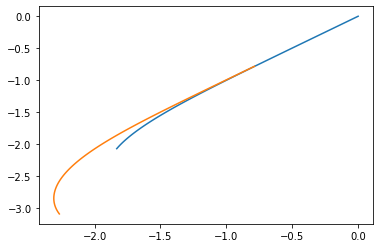

In [134]:
import matplotlib.pyplot as plt


plt.plot([env.positions[i][0] for i in range(len(env.positions))], [env.positions[i][1] for i in range(len(env.positions))])
plt.plot([env.positions[i][2] for i in range(len(env.positions))], [env.positions[i][3] for i in range(len(env.positions))])

In [149]:
env.close()